In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1657554868489.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/08/2022,3899.38,--,3888.26,3918.50,3869.34
1,07/07/2022,3902.62,--,3858.85,3910.63,3858.85
2,07/06/2022,3845.08,--,3831.98,3870.91,3809.37
3,07/05/2022,3831.39,--,3792.61,3832.19,3742.06
4,07/01/2022,3825.33,--,3781.00,3829.82,3752.10
...,...,...,...,...,...,...
2542,07/17/2012,1363.67,--,1353.68,1365.36,1345.07
2543,07/16/2012,1353.64,--,1356.50,1357.26,1348.51
2544,07/13/2012,1356.78,--,1334.81,1357.70,1334.81
2545,07/12/2012,1334.76,--,1341.29,1341.29,1325.41


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2612.315163,2589.338280,2602.711068,2574.718115
std,873.634875,916.388169,922.290827,909.571453
min,1334.760000,0.000000,0.000000,0.000000
25%,1983.190000,1976.765000,1985.110000,1966.765000
50%,2425.180000,2425.660000,2433.950000,2408.550000
75%,3003.520000,3003.340000,3014.795000,2988.365000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2622.675193,2622.284135,2635.827074,2607.477948
std,873.827668,874.087342,879.843675,867.407882
min,1334.760000,1334.810000,1341.290000,1325.410000
25%,1988.420000,1986.720000,1996.700000,1977.805000
50%,2434.500000,2434.270000,2443.750000,2424.750000
75%,3007.090000,3010.545000,3018.695000,2996.085000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

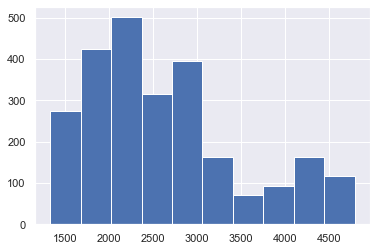

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3899.38

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2622.675192842952

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.8276676808799

In [11]:
sigma1 = close_mean + close_sd
sigma1

3496.502860523832

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4370.330528204712

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5244.158195885591

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-07-11 to 2022-07-08')

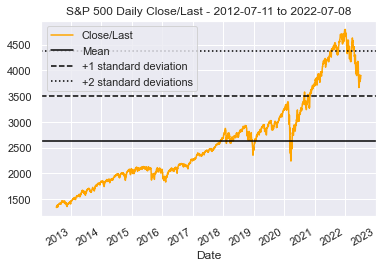

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-07-11 to 2022-07-08')

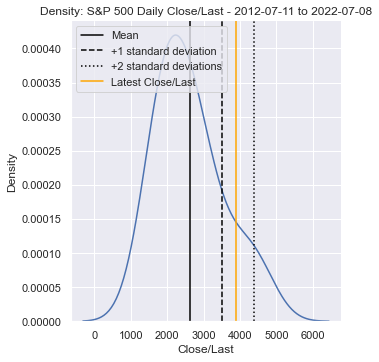

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.4610487334938655